## Showing the img

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('R.jpg')

In [3]:
img

array([[[  0, 105,  53],
        [  0, 105,  53],
        [  0, 104,  53],
        ...,
        [  3,  85,  43],
        [  2,  81,  42],
        [  2,  79,  41]],

       [[  0, 106,  57],
        [  0, 106,  57],
        [  1, 106,  55],
        ...,
        [  4,  86,  44],
        [  4,  83,  44],
        [  3,  80,  42]],

       [[  1, 108,  59],
        [  2, 107,  58],
        [  2, 107,  56],
        ...,
        [  6,  88,  46],
        [  5,  84,  45],
        [  4,  81,  43]],

       ...,

       [[ 80, 170, 104],
        [ 59, 156,  90],
        [  1, 108,  46],
        ...,
        [ 18, 127,  71],
        [ 16, 127,  71],
        [ 19, 130,  74]],

       [[ 53, 143,  77],
        [ 38, 135,  69],
        [  7, 114,  52],
        ...,
        [  9, 118,  62],
        [ 10, 119,  63],
        [ 11, 122,  66]],

       [[ 26, 116,  50],
        [ 12, 109,  43],
        [  5, 112,  50],
        ...,
        [  2, 109,  53],
        [  2, 111,  55],
        [  6, 115,  59]]

In [4]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape
# shape: height, width, channels(rgb)

(627, 670, 3)

In [6]:
img=cv2.imread('R.jpg',cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE
print(img, img.shape)

[[ 77  77  77 ...  63  60  59]
 [ 79  79  79 ...  64  62  60]
 [ 81  80  80 ...  66  63  61]
 ...
 [140 125  77 ...  98  98 101]
 [113 104  83 ...  89  90  93]
 [ 86  78  81 ...  80  82  86]] (627, 670)


In [7]:
cv_show('gray',img)

In [8]:
cv2.imwrite('grey_cat.png', img)
# save the image

True

In [9]:
print(type(img), img.size, img.dtype)

<class 'numpy.ndarray'> 420090 uint8


## Video opening and processing

In [10]:
vc=cv2.VideoCapture('cat.mp4')
# vc.read()

In [11]:
if vc.isOpened():
    open, frame = vc.read()
else:
    open=False

In [12]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert the color to grey
        cv2.imshow('result', gray)
        if cv2.waitKey(15) &  0xFF ==27: # set the playing time and exit key 0xFF ==27 means esc
            break

vc.release()
cv2.destroyAllWindows()

## Processing the img data

In [13]:
img = cv2.imread('R.jpg')
cat = img [100:300, 300:500] # cutting the specific area of the img
cv_show('cat', cat)

In [14]:
b, g, r = cv2.split(img) # extract blue, green and red
print(b)
cv_show('blue', b)
img_1 = cv2.merge((b, g, r)) # merge the different color into one image
cv_show('color', img_1)

[[ 0  0  0 ...  3  2  2]
 [ 0  0  1 ...  4  4  3]
 [ 1  2  2 ...  6  5  4]
 ...
 [80 59  1 ... 18 16 19]
 [53 38  7 ...  9 10 11]
 [26 12  5 ...  2  2  6]]


In [15]:
img_1[:,:,1] = 0 # height, width, channels
img_1[:,:,2] = 0 # turn the B and R into 0
cv_show('green',img_1)
# print(img_1)

## Boundary padding

In [16]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)


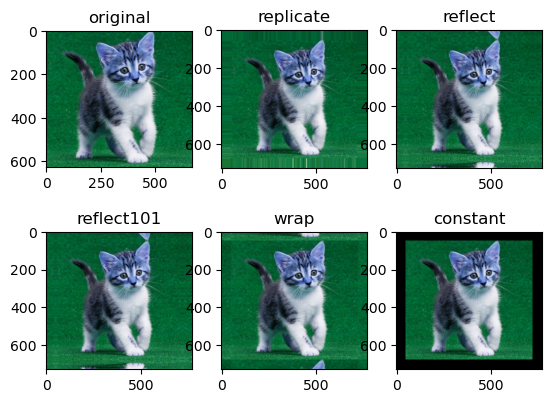

In [17]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

plt.show()


In [18]:
vc=cv2.VideoCapture('cat.mp4')
# vc.read()

## numerical computation

In [19]:
cat_img = cv2.imread('R.jpg')
dog_img = cv2.imread('Dog.jpg')
print(cat_img.shape, dog_img.shape)

(627, 670, 3) (2497, 3296, 3)


(627, 670, 3)


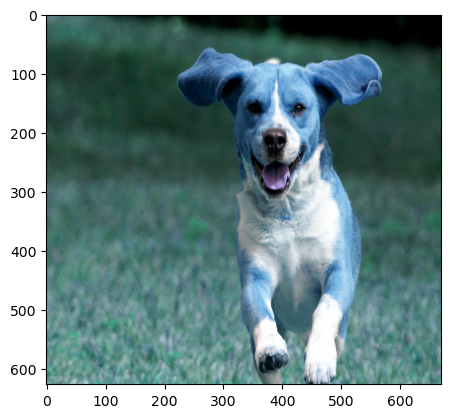

In [20]:
dogy_img = cv2.resize(dog_img,(670, 627))
print(dogy_img.shape)
plt.imshow(dogy_img)
plt.show()

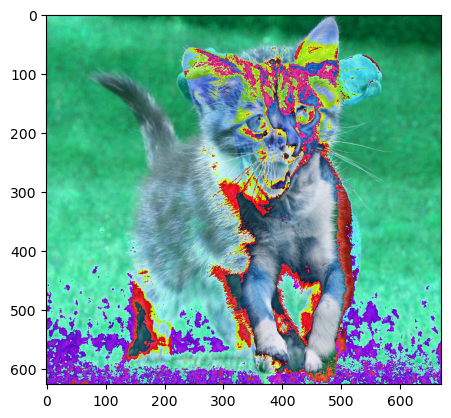

In [21]:
merged=cat_img + dogy_img
plt.imshow(merged)
plt.show()

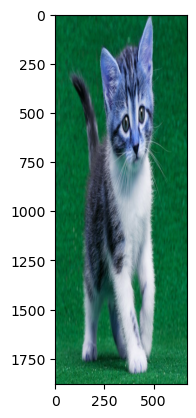

In [22]:
copy_img = cv2.resize(cat_img,(0,0), fx=1, fy=3)
plt.imshow(copy_img)
plt.show()